In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
measurements = pd.read_csv("../data/measurements.csv")

# Exploring Data:

#### First I want to take a look at the DB and assess it quantitatively and qualitatively:

In [23]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [24]:
measurements.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [25]:
measurements.shape

(388, 12)

Let's check what NaN do we have. I iterate throught the cols with a for loop:

In [26]:
for column in measurements:
    print(f"{column}, {measurements[column].isna().sum()}")

distance, 0
consume, 0
speed, 0
temp_inside, 12
temp_outside, 0
specials, 295
gas_type, 0
AC, 0
rain, 0
sun, 0
refill liters, 375
refill gas, 375


Clearly I can't count ont the "specials" column, nor the last two to give me much information. I will drop them:

In [27]:
measurements = measurements.drop(["specials","refill liters","refill gas"],axis = 1)

In [28]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [29]:
measurements.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


As we've seen above, distance, temp_inside and consume are objects, but at plain sight they seem to store numerical values which are not being shown here due to their current data type. Maybe we can coherece these into integers/floats. We will need to convert the "," into "." first:

In [30]:
measurements["distance"] = measurements["distance"].str.replace(',','.')
measurements["consume"] = measurements["consume"].str.replace(',','.')
measurements["temp_inside"] = measurements["temp_inside"].str.replace(',','.')

In [31]:
measurements['consume'] = measurements['consume'].astype(float)
measurements['temp_inside'] = measurements['temp_inside'].astype(float)
measurements['distance'] = measurements['distance'].astype(float)

In [32]:
measurements.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [33]:
measurements.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


it seems like AC, rain and sun are binary variables(?). Let's check:

In [34]:
print(measurements["AC"].value_counts())
print(measurements["rain"].value_counts())
print(measurements["sun"].value_counts())

AC
0    358
1     30
Name: count, dtype: int64
rain
0    340
1     48
Name: count, dtype: int64
sun
0    356
1     32
Name: count, dtype: int64


Yes.

In [35]:
for column in measurements:
    print(f"{column}, {measurements[column].isna().sum()}")

distance, 0
consume, 0
speed, 0
temp_inside, 12
temp_outside, 0
gas_type, 0
AC, 0
rain, 0
sun, 0


I am just left with 12 rows where I've got no information for the temp_inside, I will not drop it just yet cause maybe I can still interpret data and use it with them being NaN. If I were to do so, I'd use:

In [36]:
measurements = measurements[measurements["temp_inside"].notna()]

### Some human interpretation to it:

###### I came up with a final dataframe where I've drop the columns that were not providing me much information (the vast majority being NaN) - "specials","refill liters","refill gas". Additionally converted the object columns into floats after replacing the commas with dots and cohercing them. I described the columns to get some perspective on descriptive statistics for them and confirmed that some of these columns take on binary values.

###### The dataframe suggests that several (in the end in my DF = 388) 388 tests were performed to assess fuels performance. It depicts the distance travelled in the test (distance column), the consumption (which I assume will be a miles per gallon or km per liter for example, possibly the second one given the dimension of the numbers), the speed (I assume average) during the test, the temperature (either inside the tank or the vehicle since no more info is provided) and the temperatur outside (weather basically) as well as the type of gas (which can be SP98 or E10: measurements["gas_type"].value_counts() ) and some additionaly information stating whther the AC was on (col "AC" = 1), if there was rain (rain = 1) or sun (sun = 1).

In [37]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


# Visualizations:

Some ideas come to my head when it comes to visualizations and I will center my story around the two types of fuels. I can think of a distribution of consumptions per fuel but also to represent their descriptive stats

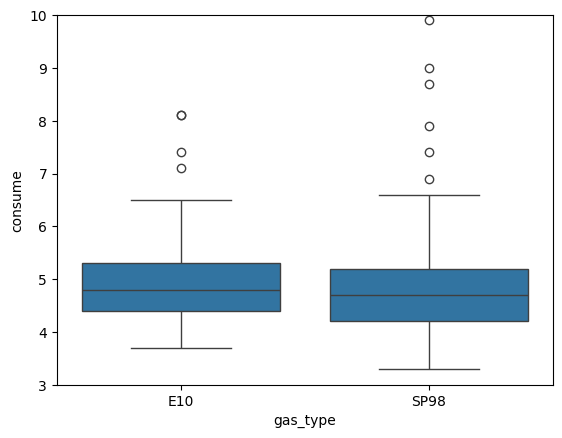

In [98]:
# I am disregarding some outliers and adjusting the window size:
boxplot_fuels_consumption = sns.boxplot(x="gas_type",data=measurements,y="consume")
plt.ylim(3, 10)
boxplot_fuels_consumption.figure.savefig('../images/boxplot_fuels_consumption.png')

Is any of the fuels being penalized due to factors like the speed, the speed, temperatures or AC/rain/sun?

let's check the binary variables first:

In [58]:
measurements["gas_type"].value_counts()

gas_type
SP98    219
E10     157
Name: count, dtype: int64

In [57]:
print(measurements.groupby("gas_type")["AC"].mean())
print(measurements.groupby("gas_type")["rain"].mean())
print(measurements.groupby("gas_type")["sun"].mean())

gas_type
E10     0.044586
SP98    0.105023
Name: AC, dtype: float64
gas_type
E10     0.101911
SP98    0.141553
Name: rain, dtype: float64
gas_type
E10     0.070064
SP98    0.091324
Name: sun, dtype: float64


SP98 seems to have specially more observations where the AC was on which could potentially penalyze the consumption. To tackle this, we can assess the consumptions with and without AC on for both fuels:

In [76]:
# AC ON
measurements_ac_on = measurements[measurements["AC"]==1]
measurements_ac_on.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_type_binary,speed_bin
40,12.4,4.0,55,21.5,7,E10,1,1,0,1,"[50, 60)"
41,4.5,5.0,29,21.5,7,E10,1,0,0,1,"[20, 30)"
60,2.9,7.9,18,21.5,9,SP98,1,1,0,0,"[10, 20)"
61,2.1,12.2,23,21.5,9,SP98,1,1,0,0,"[20, 30)"
69,11.8,4.5,37,21.5,4,SP98,1,0,0,0,"[30, 40)"


gas_type
E10      7
SP98    23
Name: consume, dtype: int64


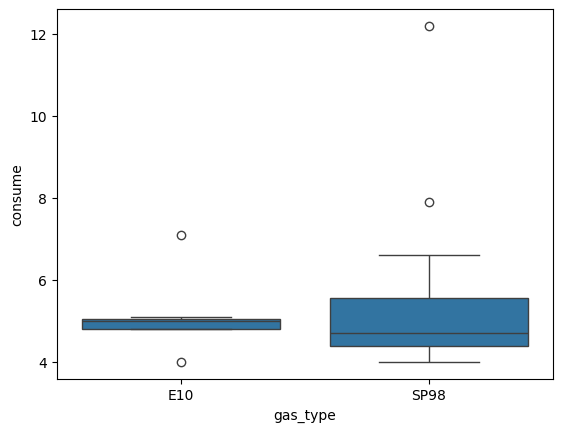

In [99]:
print(measurements_ac_on.groupby("gas_type")["consume"].count())
boxplot_fuels_consumption_ac_on = sns.boxplot(x="gas_type",data=measurements_ac_on,y="consume")
boxplot_fuels_consumption_ac_on.figure.savefig('../images/boxplot_fuels_consumption_ac_on.png')

There's little observations for AC ON, but still SP98 seems to perform better (lower consume) according to the median and Q1

In [83]:
# AC OFF
measurements_ac_off = measurements[measurements["AC"]==0]
measurements_ac_off.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_type_binary,speed_bin
0,28.0,5.0,26,21.5,12,E10,0,0,0,1,"[20, 30)"
1,12.0,4.2,30,21.5,13,E10,0,0,0,1,"[30, 40)"
2,11.2,5.5,38,21.5,15,E10,0,0,0,1,"[30, 40)"
3,12.9,3.9,36,21.5,14,E10,0,0,0,1,"[30, 40)"
4,18.5,4.5,46,21.5,15,E10,0,0,0,1,"[40, 50)"


gas_type
E10     150
SP98    196
Name: consume, dtype: int64


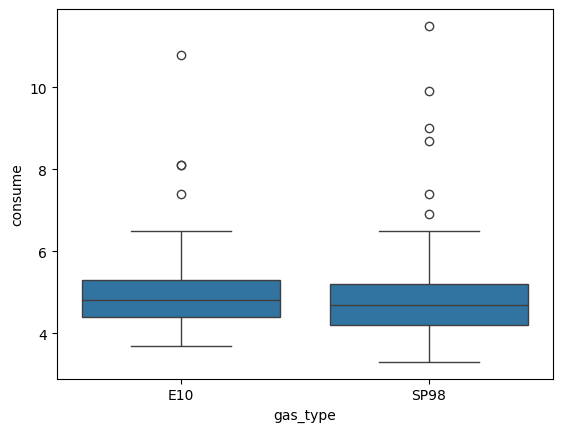

In [100]:
print(measurements_ac_off.groupby("gas_type")["consume"].count())
boxplot_fuels_consumption_ac_off = sns.boxplot(x="gas_type",y="consume",data=measurements_ac_off)
boxplot_fuels_consumption_ac_off.figure.savefig('../images/boxplot_fuels_consumption_ac_off.png')

Still with the AC off, SP98 is performing slightly better in the comparable Q1,2(median) and Q3

In [67]:
measurements['speed_bin'] = pd.cut(measurements['speed'], bins=range(0, max(measurements['speed']) + 10, 10), right=False)
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_type_binary,speed_bin
0,28.0,5.0,26,21.5,12,E10,0,0,0,1,"[20, 30)"
1,12.0,4.2,30,21.5,13,E10,0,0,0,1,"[30, 40)"
2,11.2,5.5,38,21.5,15,E10,0,0,0,1,"[30, 40)"
3,12.9,3.9,36,21.5,14,E10,0,0,0,1,"[30, 40)"
4,18.5,4.5,46,21.5,15,E10,0,0,0,1,"[40, 50)"


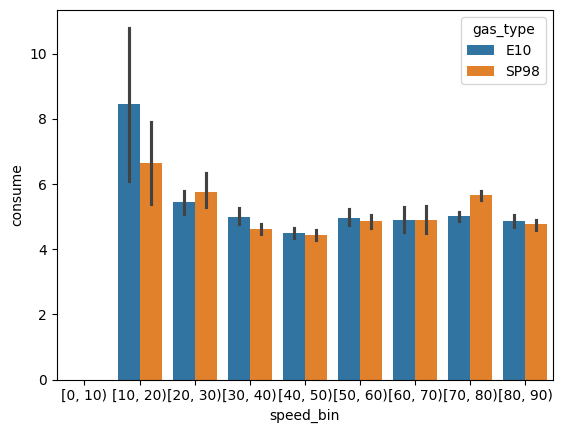

In [101]:
consume_at_diff_speeds_per_fuel = sns.barplot(x="speed_bin", y="consume", data=measurements, hue="gas_type");
consume_at_diff_speeds_per_fuel.figure.savefig('../images/consume_at_diff_speeds_per_fuel.png')

We could have also achieved this with a scatter plot:

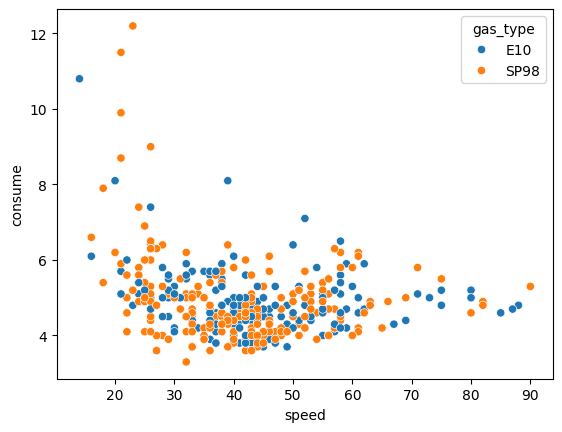

In [102]:
consume_at_diff_speeds_per_fuel_scat = sns.scatterplot(x="speed", y="consume", data=measurements, hue="gas_type");
consume_at_diff_speeds_per_fuel_scat.figure.savefig('../images/consume_at_diff_speeds_per_fuel_scat.png')

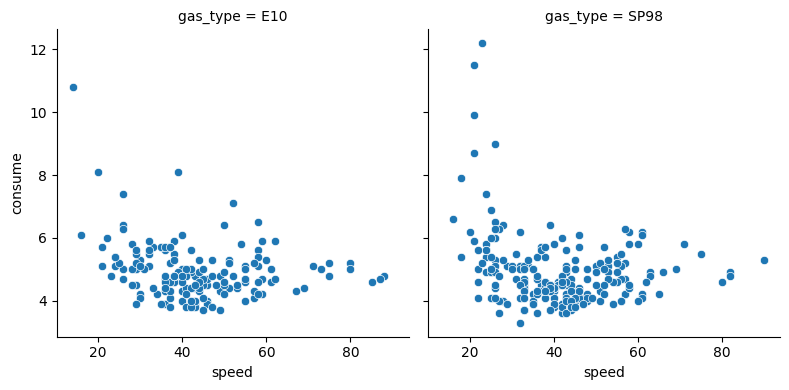

In [103]:
#splitting the scatters:
consume_at_diff_speeds_per_fuel_scat_split = sns.FacetGrid(measurements, col="gas_type",height=4)
consume_at_diff_speeds_per_fuel_scat_split = consume_at_diff_speeds_per_fuel_scat_split.map(sns.scatterplot, "speed", "consume")
consume_at_diff_speeds_per_fuel_scat_split.figure.savefig('../images/consume_at_diff_speeds_per_fuel_scat_split.png')

What about at temperature level?

Outside:

gas_type
E10     10.031847
SP98    12.278539
Name: temp_outside, dtype: float64


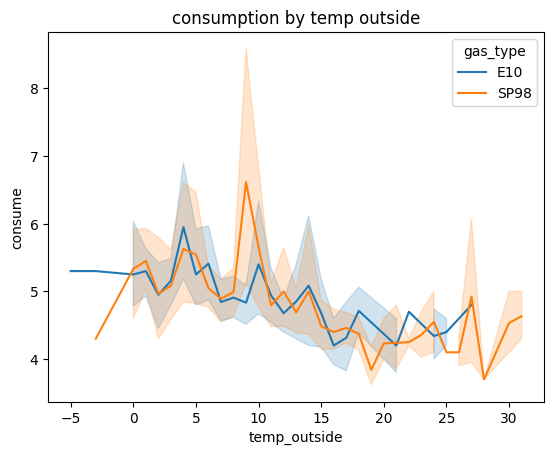

In [118]:
#temp_outside
print(measurements.groupby("gas_type")["temp_outside"].mean())
consume_by_temp_outside = sns.lineplot(x="temp_outside",y="consume",data=measurements,hue="gas_type")
plt.title("consumption by temp outside")
consume_by_temp_outside.figure.savefig("../images/consume_by_temp_outside.png")

Inside

gas_type
E10     21.917197
SP98    21.938356
Name: temp_inside, dtype: float64


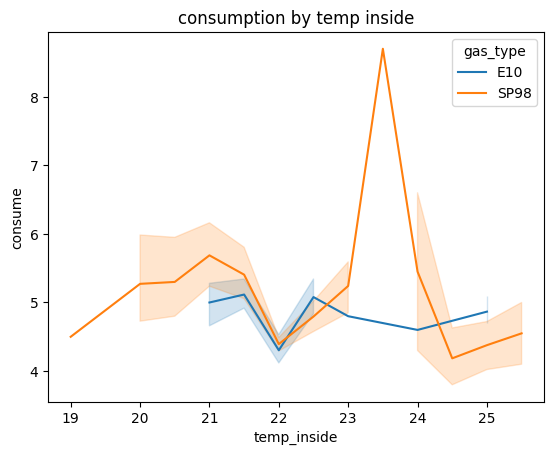

In [116]:
#temp_inside
print(measurements.groupby("gas_type")["temp_inside"].mean())
consume_by_temp_inside = sns.lineplot(x="temp_inside",y="consume",data=measurements,hue="gas_type")
plt.title("consumption by temp inside")
consume_by_temp_inside.figure.savefig("../images/consume_by_temp_inside.png")